In [2]:
import csv
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from datetime import datetime, date
import warnings
warnings.filterwarnings("ignore")

In [3]:
nodes = pd.read_csv('UofT_nodes.csv')

In [4]:
nodes.head(50)

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0
5,1969-05-22,2011-10-03,89.0,1,1,0.0,4274.825,8.0,10454.469,25.0,456359.0,107.0,276603.0,164.0,Low,Low,low,Mary Gilmore an,Female,2473.0
6,1951-03-31,2007-08-07,89.0,1,1,0.0,6535.232,8.0,7059.521,21.0,74927.0,17.0,139436.0,58.0,Low,Low,low,Jacqueline Thompson Burke Spann,Female,568597.0
7,1986-08-26,2012-11-26,89.0,1,1,0.0,316.046,0.0,3894.914,16.0,335104.0,93.0,205929.0,205.0,Low,Low,low,"Alderson, James Mccombs Wilcox",Male,395257.0
8,2002-06-24,2012-11-28,89.0,1,1,0.0,4684.540,9.0,1851.315,9.0,348805.0,83.0,521669.0,257.0,Low,Low,low,"Morris, Maria Bitto Minnick",Female,590694.0
9,1968-01-13,1997-12-23,89.0,1,1,0.0,3657.827,6.0,13503.562,35.0,413181.0,108.0,451743.0,315.0,Low,Low,low,"Mcneil, Jennifer Delargy Park",Female,738891.0


In [5]:
occupation = pd.read_csv('UofT_occupation_risk.csv')

In [6]:
occupation.head(50)

,code,occupation_risk
0,0,Low
1,1,High
2,2,Low
3,3,Low
4,4,Low
5,5,Low
6,6,Low
7,7,Moderate
8,8,Low
9,9,Low


In [7]:
merged_df = pd.merge(nodes, occupation, left_on = 'OCPTN_NM', right_on = 'code', how = 'left')

In [8]:
#pd.set_option('display.max_columns', None)

In [9]:
merged_df

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,...,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID,code,occupation_risk
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,...,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0,89.0,High
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,...,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0,89.0,High
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,...,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0,89.0,High
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,...,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0,89.0,High
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,...,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0,89.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1939-01-16,1994-03-19,467.0,0,1,0.0,18945.108,10.0,32210.000,21.0,...,2550098.0,174.0,Low,High,high,Bret* Dove Gainey,Male,420884.0,467.0,Low
999996,1970-12-13,1995-12-22,467.0,0,1,0.0,5775.601,7.0,5015.741,15.0,...,417992.0,337.0,Low,Low,low,Anthony Ray Montano Gomez,Male,429418.0,467.0,Low
999997,1958-09-09,2010-11-03,65.0,0,1,0.0,2351.255,2.0,15997.000,19.0,...,948981.0,124.0,Low,High,high,Bernadette Schofield Pace Mile,Female,731360.0,65.0,High
999998,1983-09-15,2013-01-30,231.0,0,1,0.0,27312.613,8.0,3399.000,5.0,...,376429.0,12.0,Low,High,high,"Wasson, Russell Terrell",Male,837988.0,231.0,High


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   BIRTH_DT                1000000 non-null  object 
 1   CUST_ADD_DT             995822 non-null   object 
 2   OCPTN_NM                993616 non-null   float64
 3   RES_CNTRY_CA            1000000 non-null  int64  
 4   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 5   PEP_FL                  1000000 non-null  float64
 6   CASH_SUM_IN             1000000 non-null  float64
 7   CASH_CNT_IN             1000000 non-null  float64
 8   CASH_SUM_OUT            1000000 non-null  float64
 9   CASH_CNT_OUT            1000000 non-null  float64
 10  WIRES_SUM_IN            1000000 non-null  float64
 11  WIRES_CNT_IN            1000000 non-null  float64
 12  WIRES_SUM_OUT           1000000 non-null  float64
 13  WIRES_CNT_OUT           1000000 non-null  float64
 14  COU

In [11]:
merged_df.describe()

,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,CUSTOMER_ID,code
count,993616.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,993616.000000
mean,381.329028,0.985686,0.98855,0.097489,15062.980362,8.596567,23353.115677,23.146121,3.411956e+06,85.394548,1.382649e+06,152.431128,5.003547e+05,381.329028
std,302.806156,0.118782,0.10639,0.296623,20323.375203,8.426340,33337.695394,20.867079,5.754767e+06,66.773057,2.165856e+06,120.158287,2.888723e+05,302.806156
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,89.000000,1.000000,1.00000,0.000000,2575.721000,3.000000,3419.478250,8.000000,1.209508e+05,33.000000,1.053308e+05,59.000000,2.501808e+05,89.000000
50%,354.000000,1.000000,1.00000,0.000000,5983.672500,6.000000,8001.721500,17.000000,2.981515e+05,71.000000,2.550340e+05,126.000000,5.003765e+05,354.000000
75%,724.000000,1.000000,1.00000,0.000000,19206.000000,11.000000,29862.000000,32.000000,4.688108e+06,122.000000,1.926422e+06,218.000000,7.505282e+05,724.000000
max,840.000000,1.000000,1.00000,1.000000,188953.000000,79.000000,310117.000000,203.000000,4.781359e+07,605.000000,1.893074e+07,1083.000000,1.000677e+06,840.000000


In [12]:
#change BIRTH_DT into Age
merged_df['BIRTH_DT'] = pd.to_datetime(merged_df['BIRTH_DT'], format='%Y-%m-%d')
merged_df['BIRTH_DT'] = merged_df['BIRTH_DT'].dt.date

today = datetime.now().date()
merged_df['AGE'] = today - merged_df['BIRTH_DT']
merged_df['AGE'] = merged_df['AGE'].dt.days // 365

In [13]:
#change CUST_ADD_DT into date at bank
merged_df['CUST_ADD_DT'] = pd.to_datetime(merged_df['CUST_ADD_DT'], format = '%Y-%m-%d')
merged_df['CUST_ADD_DT'] = merged_df['CUST_ADD_DT'].dt.date

today = datetime.now().date()
merged_df['YEAR_AT_BANK'] = today - merged_df['CUST_ADD_DT']
merged_df['YEAR_AT_BANK'] = merged_df['YEAR_AT_BANK'].dt.days // 365

In [14]:
merged_df

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,...,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID,code,occupation_risk,AGE,YEAR_AT_BANK
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,...,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0,89.0,High,41,15.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,...,Low,Low,low,Mark Stupar Lecy,Male,2305.0,89.0,High,29,3.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,...,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0,89.0,High,60,11.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,...,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0,89.0,High,24,21.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,...,Low,Low,low,Carolyn Washington Roberts,Female,418265.0,89.0,High,81,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1939-01-16,1994-03-19,467.0,0,1,0.0,18945.108,10.0,32210.000,21.0,...,Low,High,high,Bret* Dove Gainey,Male,420884.0,467.0,Low,84,28.0
999996,1970-12-13,1995-12-22,467.0,0,1,0.0,5775.601,7.0,5015.741,15.0,...,Low,Low,low,Anthony Ray Montano Gomez,Male,429418.0,467.0,Low,52,27.0
999997,1958-09-09,2010-11-03,65.0,0,1,0.0,2351.255,2.0,15997.000,19.0,...,Low,High,high,Bernadette Schofield Pace Mile,Female,731360.0,65.0,High,64,12.0
999998,1983-09-15,2013-01-30,231.0,0,1,0.0,27312.613,8.0,3399.000,5.0,...,Low,High,high,"Wasson, Russell Terrell",Male,837988.0,231.0,High,39,10.0


In [15]:
cols = ['CUSTOMER_ID', 'NAME', 'AGE', 'GENDER', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'CASH_SUM_IN', 'CASH_SUM_OUT', 'CASH_CNT_IN', 'CASH_CNT_OUT', 'WIRES_SUM_IN', 'WIRES_SUM_OUT', 'WIRES_CNT_IN', 'WIRES_CNT_OUT', 'COUNTRY_RISK_INCOME', 'COUNTRY_RISK_RESIDENCY', 'occupation_risk', 'YEAR_AT_BANK', 'RISK']

In [16]:
new_df = merged_df[cols]

In [17]:
new_df

,CUSTOMER_ID,NAME,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_SUM_OUT,CASH_CNT_IN,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_SUM_OUT,WIRES_CNT_IN,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,occupation_risk,YEAR_AT_BANK,RISK
0,935382.0,"Young, Marie Mildren Coleman",41,Female,1,1,0.0,2577.785,2851.663,2.0,7.0,70774.0,24244.0,62.0,35.0,Low,Low,High,15.0,low
1,2305.0,Mark Stupar Lecy,29,Male,1,1,0.0,3035.502,4805.997,2.0,15.0,282929.0,196439.0,76.0,152.0,Low,Low,High,3.0,low
2,472403.0,Dean Glasper Wendel Reeves,60,Male,1,1,0.0,1617.571,3482.809,1.0,11.0,7632.0,33598.0,6.0,20.0,Low,Low,High,11.0,low
3,227994.0,"Hulsey, Linda Rauth",24,Female,1,1,0.0,3587.042,1940.943,5.0,8.0,149253.0,105896.0,71.0,238.0,Low,Low,High,21.0,low
4,418265.0,Carolyn Washington Roberts,81,Female,1,1,0.0,1725.524,13197.169,2.0,43.0,92318.0,187403.0,96.0,180.0,Low,Low,High,10.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,420884.0,Bret* Dove Gainey,84,Male,0,1,0.0,18945.108,32210.000,10.0,21.0,1186467.0,2550098.0,25.0,174.0,Low,High,Low,28.0,high
999996,429418.0,Anthony Ray Montano Gomez,52,Male,0,1,0.0,5775.601,5015.741,7.0,15.0,244504.0,417992.0,53.0,337.0,Low,Low,Low,27.0,low
999997,731360.0,Bernadette Schofield Pace Mile,64,Female,0,1,0.0,2351.255,15997.000,2.0,19.0,3024271.0,948981.0,68.0,124.0,Low,High,High,12.0,high
999998,837988.0,"Wasson, Russell Terrell",39,Male,0,1,0.0,27312.613,3399.000,8.0,5.0,943477.0,376429.0,9.0,12.0,Low,High,High,10.0,high


In [18]:
new_df.corr()

,CUSTOMER_ID,AGE,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_SUM_OUT,CASH_CNT_IN,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_SUM_OUT,WIRES_CNT_IN,WIRES_CNT_OUT,YEAR_AT_BANK
CUSTOMER_ID,1.000000,-0.000699,-0.001143,0.001191,-0.001315,0.000093,-0.000088,0.000630,-0.000459,-0.000155,0.000297,-0.001296,0.000023,-0.000558
AGE,-0.000699,1.000000,-0.033409,-0.007505,0.066772,0.049288,0.125498,0.001733,0.100063,0.149055,0.155168,-0.021314,-0.039626,0.561425
RES_CNTRY_CA,-0.001143,-0.033409,1.000000,0.029049,-0.026723,-0.063550,-0.054083,-0.039347,-0.015968,-0.066683,-0.075422,0.037485,0.021660,0.026331
CNTRY_OF_INCOME_CA,0.001191,-0.007505,0.029049,1.000000,-0.007470,-0.015280,-0.008478,-0.010457,-0.001588,-0.008690,-0.010397,0.009957,0.005815,0.010662
PEP_FL,-0.001315,0.066772,-0.026723,-0.007470,1.000000,0.199309,0.226687,0.143242,0.162801,0.204057,0.197912,0.103780,0.080394,0.119693
CASH_SUM_IN,0.000093,0.049288,-0.063550,-0.015280,0.199309,1.000000,0.586298,0.915346,0.469528,0.473499,0.499819,0.255888,0.316364,0.009441
CASH_SUM_OUT,-0.000088,0.125498,-0.054083,-0.008478,0.226687,0.586298,1.000000,0.512216,0.851496,0.623890,0.628060,0.375184,0.421984,0.135141
CASH_CNT_IN,0.000630,0.001733,-0.039347,-0.010457,0.143242,0.915346,0.512216,1.000000,0.475869,0.362159,0.395442,0.275431,0.357508,-0.009132
CASH_CNT_OUT,-0.000459,0.100063,-0.015968,-0.001588,0.162801,0.469528,0.851496,0.475869,1.000000,0.447223,0.467904,0.479200,0.547312,0.159552
WIRES_SUM_IN,-0.000155,0.149055,-0.066683,-0.008690,0.204057,0.473499,0.623890,0.362159,0.447223,1.000000,0.864838,0.404182,0.336000,0.126749


<AxesSubplot:>

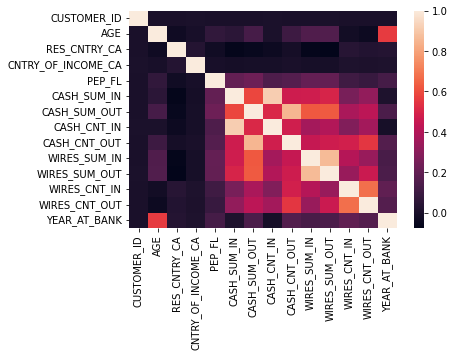

In [19]:
sns.heatmap(new_df.corr())

In [20]:
columns = ['AGE', 'GENDER', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'CASH_SUM_IN', 'CASH_SUM_OUT', 'CASH_CNT_IN', 'CASH_CNT_OUT', 'WIRES_SUM_IN', 'WIRES_SUM_OUT', 'WIRES_CNT_IN', 'WIRES_CNT_OUT', 'YEAR_AT_BANK', 'RISK']
data = new_df[columns]

In [21]:
data

,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_SUM_OUT,CASH_CNT_IN,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_SUM_OUT,WIRES_CNT_IN,WIRES_CNT_OUT,YEAR_AT_BANK,RISK
0,41,Female,1,1,0.0,2577.785,2851.663,2.0,7.0,70774.0,24244.0,62.0,35.0,15.0,low
1,29,Male,1,1,0.0,3035.502,4805.997,2.0,15.0,282929.0,196439.0,76.0,152.0,3.0,low
2,60,Male,1,1,0.0,1617.571,3482.809,1.0,11.0,7632.0,33598.0,6.0,20.0,11.0,low
3,24,Female,1,1,0.0,3587.042,1940.943,5.0,8.0,149253.0,105896.0,71.0,238.0,21.0,low
4,81,Female,1,1,0.0,1725.524,13197.169,2.0,43.0,92318.0,187403.0,96.0,180.0,10.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,84,Male,0,1,0.0,18945.108,32210.000,10.0,21.0,1186467.0,2550098.0,25.0,174.0,28.0,high
999996,52,Male,0,1,0.0,5775.601,5015.741,7.0,15.0,244504.0,417992.0,53.0,337.0,27.0,low
999997,64,Female,0,1,0.0,2351.255,15997.000,2.0,19.0,3024271.0,948981.0,68.0,124.0,12.0,high
999998,39,Male,0,1,0.0,27312.613,3399.000,8.0,5.0,943477.0,376429.0,9.0,12.0,10.0,high


In [22]:
# Read in the UofT_edges.csv, it concludes the source customer id and target customer id and the emt amount. 
edges = pd.read_csv('UofT_edges.csv')
edges

,source,target,emt
0,983859.0,544485.0,503.807815
1,605618.0,362627.0,5157.568486
2,323189.0,118238.0,498.628481
3,919153.0,983859.0,401.962668
4,995748.0,983859.0,5095.458776
...,...,...,...
466228,743092.0,307628.0,2959.506391
466229,420266.0,489593.0,208.011081
466230,441447.0,877470.0,2221.199295
466231,444883.0,137297.0,1175.932049


In [23]:
# merging the emt data to the nodes dataset
edges['EMT_AVG_OUT'] = edges.groupby('source')['emt'].transform(lambda x: x.sum())
edges['EMT_AVG_IN'] = edges.groupby('target')['emt'].transform(lambda x: x.sum())
EMT_AVG_OUT = edges[['source', 'EMT_AVG_OUT']].drop_duplicates(keep='last')
EMT_AVG_IN = edges[['target', 'EMT_AVG_IN']].drop_duplicates(keep='last')
# adding emt_out
new_df = new_df.merge(EMT_AVG_OUT, left_on='CUSTOMER_ID',right_on = 'source', how='left').drop(columns = ['source'])
# adding emt_in
new_df = new_df.merge(EMT_AVG_IN, left_on='CUSTOMER_ID',right_on = 'target', how='left').drop(columns = ['target'])

In [24]:
# setting cnt == 0 to be 1 to avoid np.inf
new_df.loc[new_df['CASH_CNT_IN'] == 0, 'CASH_CNT_IN'] = 1
new_df.loc[new_df['CASH_CNT_OUT'] == 0, 'CASH_CNT_OUT'] = 1
new_df.loc[new_df['WIRES_CNT_IN'] == 0, 'WIRES_CNT_IN'] = 1
new_df.loc[new_df['WIRES_CNT_OUT'] == 0, 'WIRES_CNT_OUT'] = 1

In [25]:
# SUM/CNT
new_df['CASH_AVG_IN'] = new_df['CASH_SUM_IN'] / new_df['CASH_CNT_IN']
new_df['CASH_AVG_OUT'] = new_df['CASH_SUM_OUT'] / new_df['CASH_CNT_OUT']

new_df['WIRES_AVG_IN'] = new_df['WIRES_SUM_IN'] / new_df['WIRES_CNT_IN']
new_df['WIRES_AVG_OUT'] = new_df['WIRES_SUM_OUT'] / new_df['WIRES_CNT_OUT']

In [26]:
# 
new_df['CASH_TOTAL_IN'] = new_df['CASH_AVG_IN'] * new_df['CASH_CNT_IN']
new_df['CASH_TOTAL_OUT'] = new_df['CASH_AVG_OUT'] * new_df['CASH_CNT_OUT']

new_df['WIRES_TOTAL_IN'] = new_df['WIRES_AVG_IN'] * new_df['WIRES_CNT_IN']
new_df['WIRES_TOTAL_OUT'] = new_df['WIRES_AVG_OUT'] * new_df['WIRES_CNT_OUT']

In [85]:
# missing value in Total
new_df['CASH_TOTAL_IN'] = new_df['CASH_TOTAL_IN'].fillna(0)
new_df['CASH_TOTAL_OUT'] = new_df['CASH_TOTAL_OUT'].fillna(0)

new_df['WIRES_TOTAL_IN'] = new_df['WIRES_TOTAL_IN'].fillna(0)
new_df['WIRES_TOTAL_OUT'] = new_df['WIRES_TOTAL_OUT'].fillna(0)

In [86]:
new_df

,CUSTOMER_ID,NAME,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_SUM_OUT,CASH_CNT_IN,...,EMT_AVG_OUT,EMT_AVG_IN,CASH_AVG_IN,CASH_AVG_OUT,WIRES_AVG_IN,WIRES_AVG_OUT,CASH_TOTAL_IN,CASH_TOTAL_OUT,WIRES_TOTAL_IN,WIRES_TOTAL_OUT
0,935382.0,"Young, Marie Mildren Coleman",41,Female,1,1,0.0,2577.785,2851.663,2.0,...,NaN,NaN,1288.892500,407.380429,1141.516129,692.685714,2577.785,2851.663,70774.0,24244.0
1,2305.0,Mark Stupar Lecy,29,Male,1,1,0.0,3035.502,4805.997,2.0,...,NaN,NaN,1517.751000,320.399800,3722.750000,1292.361842,3035.502,4805.997,282929.0,196439.0
2,472403.0,Dean Glasper Wendel Reeves,60,Male,1,1,0.0,1617.571,3482.809,1.0,...,NaN,NaN,1617.571000,316.619000,1272.000000,1679.900000,1617.571,3482.809,7632.0,33598.0
3,227994.0,"Hulsey, Linda Rauth",24,Female,1,1,0.0,3587.042,1940.943,5.0,...,NaN,NaN,717.408400,242.617875,2102.154930,444.941176,3587.042,1940.943,149253.0,105896.0
4,418265.0,Carolyn Washington Roberts,81,Female,1,1,0.0,1725.524,13197.169,2.0,...,NaN,NaN,862.762000,306.910907,961.645833,1041.127778,1725.524,13197.169,92318.0,187403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,420884.0,Bret* Dove Gainey,84,Male,0,1,0.0,18945.108,32210.000,10.0,...,3418.392838,5002.493403,1894.510800,1533.809524,47458.680000,14655.735632,18945.108,32210.000,1186467.0,2550098.0
999996,429418.0,Anthony Ray Montano Gomez,52,Male,0,1,0.0,5775.601,5015.741,7.0,...,NaN,2955.912041,825.085857,334.382733,4613.283019,1240.332344,5775.601,5015.741,244504.0,417992.0
999997,731360.0,Bernadette Schofield Pace Mile,64,Female,0,1,0.0,2351.255,15997.000,2.0,...,9927.441977,4287.453681,1175.627500,841.947368,44474.573529,7653.072581,2351.255,15997.000,3024271.0,948981.0
999998,837988.0,"Wasson, Russell Terrell",39,Male,0,1,0.0,27312.613,3399.000,8.0,...,588.008938,9419.317616,3414.076625,679.800000,104830.777778,31369.083333,27312.613,3399.000,943477.0,376429.0


In [87]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 30 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   CUSTOMER_ID             1000000 non-null  float64
 1   NAME                    999340 non-null   object 
 2   AGE                     1000000 non-null  int64  
 3   GENDER                  999372 non-null   object 
 4   RES_CNTRY_CA            1000000 non-null  int64  
 5   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 6   PEP_FL                  1000000 non-null  float64
 7   CASH_SUM_IN             1000000 non-null  float64
 8   CASH_SUM_OUT            1000000 non-null  float64
 9   CASH_CNT_IN             1000000 non-null  float64
 10  CASH_CNT_OUT            1000000 non-null  float64
 11  WIRES_SUM_IN            1000000 non-null  float64
 12  WIRES_SUM_OUT           1000000 non-null  float64
 13  WIRES_CNT_IN            1000000 non-null  float64
 14  WIR

## Logistic Regression (Inclue EMT)

In [88]:
cols = ['AGE', 'GENDER', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'COUNTRY_RISK_INCOME', 'COUNTRY_RISK_RESIDENCY', 'occupation_risk', 'CASH_TOTAL_IN', 'CASH_TOTAL_OUT', 'WIRES_TOTAL_IN', 'WIRES_TOTAL_OUT', 'YEAR_AT_BANK', 'EMT_AVG_IN', 'EMT_AVG_OUT', 'RISK']
logreg_df_1 = new_df[cols]

In [89]:
logreg_df_1.corr()

,AGE,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_TOTAL_IN,CASH_TOTAL_OUT,WIRES_TOTAL_IN,WIRES_TOTAL_OUT,YEAR_AT_BANK,EMT_AVG_IN,EMT_AVG_OUT
AGE,1.000000,-0.033409,-0.007505,0.066772,0.049288,0.125498,0.149055,0.155168,0.561425,0.025188,0.029511
RES_CNTRY_CA,-0.033409,1.000000,0.029049,-0.026723,-0.063550,-0.054083,-0.066683,-0.075422,0.026331,-0.024697,-0.027124
CNTRY_OF_INCOME_CA,-0.007505,0.029049,1.000000,-0.007470,-0.015280,-0.008478,-0.008690,-0.010397,0.010662,-0.012123,-0.014259
PEP_FL,0.066772,-0.026723,-0.007470,1.000000,0.199309,0.226687,0.204057,0.197912,0.119693,0.088759,0.087438
CASH_TOTAL_IN,0.049288,-0.063550,-0.015280,0.199309,1.000000,0.586298,0.473499,0.499819,0.009441,0.150240,0.147635
CASH_TOTAL_OUT,0.125498,-0.054083,-0.008478,0.226687,0.586298,1.000000,0.623890,0.628060,0.135141,0.105057,0.106419
WIRES_TOTAL_IN,0.149055,-0.066683,-0.008690,0.204057,0.473499,0.623890,1.000000,0.864838,0.126749,0.094260,0.097111
WIRES_TOTAL_OUT,0.155168,-0.075422,-0.010397,0.197912,0.499819,0.628060,0.864838,1.000000,0.137111,0.101012,0.105828
YEAR_AT_BANK,0.561425,0.026331,0.010662,0.119693,0.009441,0.135141,0.126749,0.137111,1.000000,-0.002515,0.000315
EMT_AVG_IN,0.025188,-0.024697,-0.012123,0.088759,0.150240,0.105057,0.094260,0.101012,-0.002515,1.000000,0.176533


<AxesSubplot:>

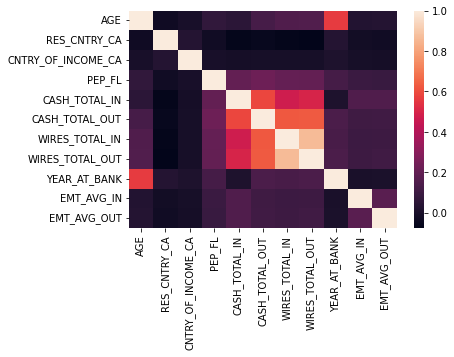

In [90]:
sns.heatmap(logreg_df_1.corr())

In [91]:
logreg_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  999372 non-null   object 
 2   RES_CNTRY_CA            1000000 non-null  int64  
 3   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 4   PEP_FL                  1000000 non-null  float64
 5   COUNTRY_RISK_INCOME     1000000 non-null  object 
 6   COUNTRY_RISK_RESIDENCY  1000000 non-null  object 
 7   occupation_risk         993616 non-null   object 
 8   CASH_TOTAL_IN           1000000 non-null  float64
 9   CASH_TOTAL_OUT          1000000 non-null  float64
 10  WIRES_TOTAL_IN          1000000 non-null  float64
 11  WIRES_TOTAL_OUT         1000000 non-null  float64
 12  YEAR_AT_BANK            995822 non-null   float64
 13  EMT_AVG_IN              241285 non-null   float64
 14  EMT

In [92]:
gender = {'Female': 0, 'Male': 1}
logreg_df_1['GENDER'] = logreg_df_1['GENDER'].replace(gender)

In [93]:
risk_income = {'Low': 1, 'Moderate': 2, 'High': 3}
logreg_df_1['COUNTRY_RISK_INCOME'] = logreg_df_1['COUNTRY_RISK_INCOME'].replace(risk_income)

In [94]:
risk_residency = {'Low': 1, 'Medium': 2, 'High': 3}
logreg_df_1['COUNTRY_RISK_RESIDENCY'] = logreg_df_1['COUNTRY_RISK_RESIDENCY'].replace(risk_income)

In [95]:
risk_occupation = {'Low': 1, 'Moderate': 2, 'High': 3}
logreg_df_1['occupation_risk'] = logreg_df_1['occupation_risk'].replace(risk_occupation)

In [96]:
logreg_df_1['EMT_AVG_IN'] = logreg_df_1['EMT_AVG_IN'].fillna(0)
logreg_df_1['EMT_AVG_OUT'] = logreg_df_1['EMT_AVG_OUT'].fillna(0)

In [97]:
logreg_df_1['YEAR_AT_BANK'] = logreg_df_1['YEAR_AT_BANK'].fillna(0)

In [98]:
logreg_df_1['occupation_risk'] = logreg_df_1['occupation_risk'].fillna(3)

In [99]:
logreg_df_1['GENDER'] = logreg_df_1['GENDER'].fillna(0 or 1)

In [43]:
logreg_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  1000000 non-null  float64
 2   RES_CNTRY_CA            1000000 non-null  int64  
 3   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 4   PEP_FL                  1000000 non-null  float64
 5   COUNTRY_RISK_INCOME     1000000 non-null  int64  
 6   COUNTRY_RISK_RESIDENCY  1000000 non-null  int64  
 7   occupation_risk         1000000 non-null  float64
 8   CASH_TOTAL_IN           1000000 non-null  float64
 9   CASH_TOTAL_OUT          1000000 non-null  float64
 10  WIRES_TOTAL_IN          1000000 non-null  float64
 11  WIRES_TOTAL_OUT         1000000 non-null  float64
 12  YEAR_AT_BANK            1000000 non-null  float64
 13  EMT_AVG_IN              1000000 non-null  float64
 14  EMT

In [44]:
logreg_df_1['GENDER'] = logreg_df_1['GENDER'].astype('object')
logreg_df_1['RES_CNTRY_CA'] = logreg_df_1['RES_CNTRY_CA'].astype('object')
logreg_df_1['CNTRY_OF_INCOME_CA'] = logreg_df_1['CNTRY_OF_INCOME_CA'].astype('object')
logreg_df_1['PEP_FL'] = logreg_df_1['PEP_FL'].astype('object')
logreg_df_1['COUNTRY_RISK_INCOME'] = logreg_df_1['COUNTRY_RISK_INCOME'].astype('object')
logreg_df_1['COUNTRY_RISK_RESIDENCY'] = logreg_df_1['COUNTRY_RISK_RESIDENCY'].astype('object')
logreg_df_1['occupation_risk'] = logreg_df_1['occupation_risk'].astype('object')

In [45]:
logreg_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  1000000 non-null  object 
 2   RES_CNTRY_CA            1000000 non-null  object 
 3   CNTRY_OF_INCOME_CA      1000000 non-null  object 
 4   PEP_FL                  1000000 non-null  object 
 5   COUNTRY_RISK_INCOME     1000000 non-null  object 
 6   COUNTRY_RISK_RESIDENCY  1000000 non-null  object 
 7   occupation_risk         1000000 non-null  object 
 8   CASH_TOTAL_IN           1000000 non-null  float64
 9   CASH_TOTAL_OUT          1000000 non-null  float64
 10  WIRES_TOTAL_IN          1000000 non-null  float64
 11  WIRES_TOTAL_OUT         1000000 non-null  float64
 12  YEAR_AT_BANK            1000000 non-null  float64
 13  EMT_AVG_IN              1000000 non-null  float64
 14  EMT

In [46]:
logreg_df_1

,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,occupation_risk,CASH_TOTAL_IN,CASH_TOTAL_OUT,WIRES_TOTAL_IN,WIRES_TOTAL_OUT,YEAR_AT_BANK,EMT_AVG_IN,EMT_AVG_OUT,RISK
0,41,0.0,1,1,0.0,1,1,3.0,2577.785,2851.663,70774.0,24244.0,15.0,0.000000,0.000000,low
1,29,1.0,1,1,0.0,1,1,3.0,3035.502,4805.997,282929.0,196439.0,3.0,0.000000,0.000000,low
2,60,1.0,1,1,0.0,1,1,3.0,1617.571,3482.809,7632.0,33598.0,11.0,0.000000,0.000000,low
3,24,0.0,1,1,0.0,1,1,3.0,3587.042,1940.943,149253.0,105896.0,21.0,0.000000,0.000000,low
4,81,0.0,1,1,0.0,1,1,3.0,1725.524,13197.169,92318.0,187403.0,10.0,0.000000,0.000000,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,84,1.0,0,1,0.0,1,3,1.0,18945.108,32210.000,1186467.0,2550098.0,28.0,5002.493403,3418.392838,high
999996,52,1.0,0,1,0.0,1,1,1.0,5775.601,5015.741,244504.0,417992.0,27.0,2955.912041,0.000000,low
999997,64,0.0,0,1,0.0,1,3,3.0,2351.255,15997.000,3024271.0,948981.0,12.0,4287.453681,9927.441977,high
999998,39,1.0,0,1,0.0,1,3,3.0,27312.613,3399.000,943477.0,376429.0,10.0,9419.317616,588.008938,high


In [47]:
logreg_df_1.corr()

,AGE,CASH_TOTAL_IN,CASH_TOTAL_OUT,WIRES_TOTAL_IN,WIRES_TOTAL_OUT,YEAR_AT_BANK,EMT_AVG_IN,EMT_AVG_OUT
AGE,1.000000,0.049288,0.125498,0.149055,0.155168,0.556479,0.021370,0.023355
CASH_TOTAL_IN,0.049288,1.000000,0.586298,0.473499,0.499819,0.009401,0.129420,0.128248
CASH_TOTAL_OUT,0.125498,0.586298,1.000000,0.623890,0.628060,0.133918,0.092852,0.093054
WIRES_TOTAL_IN,0.149055,0.473499,0.623890,1.000000,0.864838,0.125658,0.083604,0.084687
WIRES_TOTAL_OUT,0.155168,0.499819,0.628060,0.864838,1.000000,0.135944,0.089467,0.090957
YEAR_AT_BANK,0.556479,0.009401,0.133918,0.125658,0.135944,1.000000,0.000751,0.001788
EMT_AVG_IN,0.021370,0.129420,0.092852,0.083604,0.089467,0.000751,1.000000,0.194446
EMT_AVG_OUT,0.023355,0.128248,0.093054,0.084687,0.090957,0.001788,0.194446,1.000000


<AxesSubplot:>

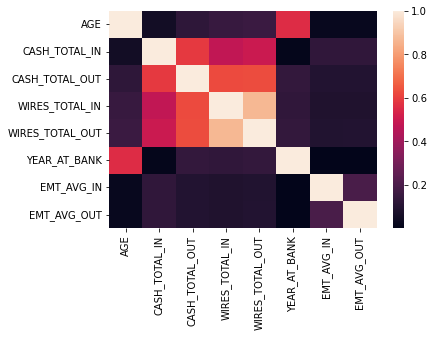

In [84]:
sns.heatmap(logreg_df_1.corr())

In [162]:
X = logreg_df_1.drop('RISK', axis = 1)
y = logreg_df_1['RISK']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [164]:
logreg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')

In [165]:
X_train

,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,occupation_risk,CASH_TOTAL_IN,CASH_TOTAL_OUT,WIRES_TOTAL_IN,WIRES_TOTAL_OUT,YEAR_AT_BANK,EMT_AVG_IN,EMT_AVG_OUT
760648,43,0.0,1,1,0.0,1,1,1.0,18989.000,601.000,1084928.0,123620.0,6.0,452.339002,1574.270068
79333,69,0.0,1,1,0.0,1,1,3.0,41340.000,25282.000,9712373.0,563770.0,34.0,0.000000,0.000000
771344,13,0.0,1,1,0.0,1,1,1.0,365.053,1094.643,246590.0,47306.0,4.0,0.000000,0.000000
179102,35,1.0,1,1,0.0,1,1,1.0,608.615,1863.578,104925.0,38454.0,21.0,0.000000,0.000000
75318,31,0.0,1,1,1.0,1,1,3.0,8548.000,271.000,2011167.0,500288.0,28.0,2960.223804,4285.575872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963395,66,0.0,1,1,1.0,1,1,3.0,3839.000,25661.000,3261926.0,931229.0,30.0,0.000000,0.000000
117952,66,1.0,1,1,0.0,1,1,3.0,10410.000,40294.000,4364108.0,5473745.0,24.0,0.000000,0.000000
435829,57,1.0,1,1,0.0,1,1,1.0,23928.000,1853.000,1022718.0,644589.0,32.0,2395.979130,1539.144633
305711,32,1.0,1,1,0.0,1,1,1.0,38917.000,20034.000,14638614.0,8770942.0,10.0,0.000000,0.000000


In [166]:
y_train

760648    medium
79333     medium
771344       low
179102       low
75318     medium
           ...  
963395    medium
117952    medium
435829    medium
305711    medium
985772       low
Name: RISK, Length: 800000, dtype: object

In [167]:
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [168]:
y_pred = logreg.predict(X_test)

In [169]:
accuracy = accuracy_score(y_test, y_pred)

In [170]:
accuracy

0.59956

## Logistic Regression(Exclude EMT)

In [171]:
cols = ['AGE', 'GENDER', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'COUNTRY_RISK_INCOME', 'COUNTRY_RISK_RESIDENCY', 'occupation_risk', 'CASH_TOTAL_IN', 'CASH_TOTAL_OUT', 'WIRES_TOTAL_IN', 'WIRES_TOTAL_OUT', 'YEAR_AT_BANK', 'RISK']
logreg_df_2 = new_df[cols]

In [172]:
logreg_df_2.corr()

,AGE,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_TOTAL_IN,CASH_TOTAL_OUT,WIRES_TOTAL_IN,WIRES_TOTAL_OUT,YEAR_AT_BANK
AGE,1.000000,-0.033409,-0.007505,0.066772,0.049288,0.125498,0.149055,0.155168,0.561425
RES_CNTRY_CA,-0.033409,1.000000,0.029049,-0.026723,-0.063550,-0.054083,-0.066683,-0.075422,0.026331
CNTRY_OF_INCOME_CA,-0.007505,0.029049,1.000000,-0.007470,-0.015280,-0.008478,-0.008690,-0.010397,0.010662
PEP_FL,0.066772,-0.026723,-0.007470,1.000000,0.199309,0.226687,0.204057,0.197912,0.119693
CASH_TOTAL_IN,0.049288,-0.063550,-0.015280,0.199309,1.000000,0.586298,0.473499,0.499819,0.009441
CASH_TOTAL_OUT,0.125498,-0.054083,-0.008478,0.226687,0.586298,1.000000,0.623890,0.628060,0.135141
WIRES_TOTAL_IN,0.149055,-0.066683,-0.008690,0.204057,0.473499,0.623890,1.000000,0.864838,0.126749
WIRES_TOTAL_OUT,0.155168,-0.075422,-0.010397,0.197912,0.499819,0.628060,0.864838,1.000000,0.137111
YEAR_AT_BANK,0.561425,0.026331,0.010662,0.119693,0.009441,0.135141,0.126749,0.137111,1.000000


<AxesSubplot:>

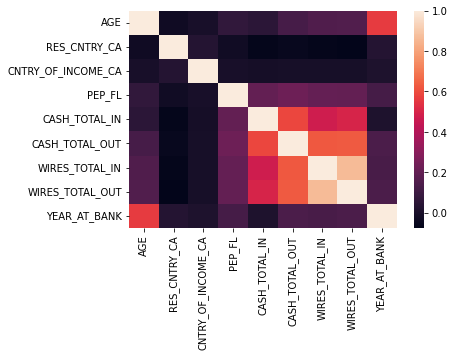

In [173]:
sns.heatmap(logreg_df_2.corr())

In [174]:
logreg_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  999372 non-null   object 
 2   RES_CNTRY_CA            1000000 non-null  int64  
 3   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 4   PEP_FL                  1000000 non-null  float64
 5   COUNTRY_RISK_INCOME     1000000 non-null  object 
 6   COUNTRY_RISK_RESIDENCY  1000000 non-null  object 
 7   occupation_risk         993616 non-null   object 
 8   CASH_TOTAL_IN           1000000 non-null  float64
 9   CASH_TOTAL_OUT          1000000 non-null  float64
 10  WIRES_TOTAL_IN          1000000 non-null  float64
 11  WIRES_TOTAL_OUT         1000000 non-null  float64
 12  YEAR_AT_BANK            995822 non-null   float64
 13  RISK                    1000000 non-null  object 
dtypes: 

In [175]:
gender = {'Female': 0, 'Male': 1}
logreg_df_2['GENDER'] = logreg_df_2['GENDER'].replace(gender)

In [176]:
risk_income = {'Low': 1, 'Moderate': 2, 'High': 3}
logreg_df_2['COUNTRY_RISK_INCOME'] = logreg_df_2['COUNTRY_RISK_INCOME'].replace(risk_income)

In [177]:
risk_residency = {'Low': 1, 'Medium': 2, 'High': 3}
logreg_df_2['COUNTRY_RISK_RESIDENCY'] = logreg_df_2['COUNTRY_RISK_RESIDENCY'].replace(risk_income)

In [178]:
risk_occupation = {'Low': 1, 'Moderate': 2, 'High': 3}
logreg_df_2['occupation_risk'] = logreg_df_2['occupation_risk'].replace(risk_occupation)

In [179]:
logreg_df_2['YEAR_AT_BANK'] = logreg_df_2['YEAR_AT_BANK'].fillna(0)

In [180]:
logreg_df_2['occupation_risk'] = logreg_df_2['occupation_risk'].fillna(3)

In [181]:
logreg_df_2['GENDER'] = logreg_df_2['GENDER'].fillna(0 or 1)

In [182]:
logreg_df_2['GENDER'] = logreg_df_1['GENDER'].astype('object')
logreg_df_2['RES_CNTRY_CA'] = logreg_df_1['RES_CNTRY_CA'].astype('object')
logreg_df_2['CNTRY_OF_INCOME_CA'] = logreg_df_1['CNTRY_OF_INCOME_CA'].astype('object')
logreg_df_2['PEP_FL'] = logreg_df_1['PEP_FL'].astype('object')
logreg_df_2['COUNTRY_RISK_INCOME'] = logreg_df_1['COUNTRY_RISK_INCOME'].astype('object')
logreg_df_2['COUNTRY_RISK_RESIDENCY'] = logreg_df_1['COUNTRY_RISK_RESIDENCY'].astype('object')
logreg_df_2['occupation_risk'] = logreg_df_1['occupation_risk'].astype('object')

In [183]:
logreg_df_2

,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,occupation_risk,CASH_TOTAL_IN,CASH_TOTAL_OUT,WIRES_TOTAL_IN,WIRES_TOTAL_OUT,YEAR_AT_BANK,RISK
0,41,0.0,1,1,0.0,1,1,3.0,2577.785,2851.663,70774.0,24244.0,15.0,low
1,29,1.0,1,1,0.0,1,1,3.0,3035.502,4805.997,282929.0,196439.0,3.0,low
2,60,1.0,1,1,0.0,1,1,3.0,1617.571,3482.809,7632.0,33598.0,11.0,low
3,24,0.0,1,1,0.0,1,1,3.0,3587.042,1940.943,149253.0,105896.0,21.0,low
4,81,0.0,1,1,0.0,1,1,3.0,1725.524,13197.169,92318.0,187403.0,10.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,84,1.0,0,1,0.0,1,3,1.0,18945.108,32210.000,1186467.0,2550098.0,28.0,high
999996,52,1.0,0,1,0.0,1,1,1.0,5775.601,5015.741,244504.0,417992.0,27.0,low
999997,64,0.0,0,1,0.0,1,3,3.0,2351.255,15997.000,3024271.0,948981.0,12.0,high
999998,39,1.0,0,1,0.0,1,3,3.0,27312.613,3399.000,943477.0,376429.0,10.0,high


In [184]:
logreg_df_2.corr()

,AGE,CASH_TOTAL_IN,CASH_TOTAL_OUT,WIRES_TOTAL_IN,WIRES_TOTAL_OUT,YEAR_AT_BANK
AGE,1.000000,0.049288,0.125498,0.149055,0.155168,0.556479
CASH_TOTAL_IN,0.049288,1.000000,0.586298,0.473499,0.499819,0.009401
CASH_TOTAL_OUT,0.125498,0.586298,1.000000,0.623890,0.628060,0.133918
WIRES_TOTAL_IN,0.149055,0.473499,0.623890,1.000000,0.864838,0.125658
WIRES_TOTAL_OUT,0.155168,0.499819,0.628060,0.864838,1.000000,0.135944
YEAR_AT_BANK,0.556479,0.009401,0.133918,0.125658,0.135944,1.000000


<AxesSubplot:>

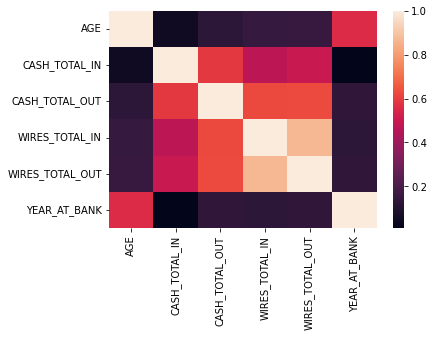

In [185]:
sns.heatmap(logreg_df_2.corr())

In [186]:
X = logreg_df_2.drop('RISK', axis = 1)
y = logreg_df_2['RISK']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [188]:
logreg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')

In [189]:
X_train

,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,occupation_risk,CASH_TOTAL_IN,CASH_TOTAL_OUT,WIRES_TOTAL_IN,WIRES_TOTAL_OUT,YEAR_AT_BANK
760648,43,0.0,1,1,0.0,1,1,1.0,18989.000,601.000,1084928.0,123620.0,6.0
79333,69,0.0,1,1,0.0,1,1,3.0,41340.000,25282.000,9712373.0,563770.0,34.0
771344,13,0.0,1,1,0.0,1,1,1.0,365.053,1094.643,246590.0,47306.0,4.0
179102,35,1.0,1,1,0.0,1,1,1.0,608.615,1863.578,104925.0,38454.0,21.0
75318,31,0.0,1,1,1.0,1,1,3.0,8548.000,271.000,2011167.0,500288.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
963395,66,0.0,1,1,1.0,1,1,3.0,3839.000,25661.000,3261926.0,931229.0,30.0
117952,66,1.0,1,1,0.0,1,1,3.0,10410.000,40294.000,4364108.0,5473745.0,24.0
435829,57,1.0,1,1,0.0,1,1,1.0,23928.000,1853.000,1022718.0,644589.0,32.0
305711,32,1.0,1,1,0.0,1,1,1.0,38917.000,20034.000,14638614.0,8770942.0,10.0


In [190]:
y_train

760648    medium
79333     medium
771344       low
179102       low
75318     medium
           ...  
963395    medium
117952    medium
435829    medium
305711    medium
985772       low
Name: RISK, Length: 800000, dtype: object

In [191]:
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [192]:
y_pred = logreg.predict(X_test)

In [193]:
accuracy = accuracy_score(y_test, y_pred)

In [194]:
accuracy

0.60999

## Decision Tree

In [49]:
columns = ['AGE', 'GENDER', 'occupation_risk', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'COUNTRY_RISK_RESIDENCY', 'COUNTRY_RISK_INCOME', 'PEP_FL', 'CASH_TOTAL_IN', 'CASH_TOTAL_OUT', 'WIRES_TOTAL_IN', 'WIRES_TOTAL_OUT', 'YEAR_AT_BANK', 'EMT_AVG_IN', 'EMT_AVG_OUT', 'RISK']
DT_df = logreg_df_1[columns]

In [50]:
DT_df

,AGE,GENDER,occupation_risk,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,COUNTRY_RISK_RESIDENCY,COUNTRY_RISK_INCOME,PEP_FL,CASH_TOTAL_IN,CASH_TOTAL_OUT,WIRES_TOTAL_IN,WIRES_TOTAL_OUT,YEAR_AT_BANK,EMT_AVG_IN,EMT_AVG_OUT,RISK
0,41,0.0,3.0,1,1,1,1,0.0,2577.785,2851.663,70774.0,24244.0,15.0,0.000000,0.000000,low
1,29,1.0,3.0,1,1,1,1,0.0,3035.502,4805.997,282929.0,196439.0,3.0,0.000000,0.000000,low
2,60,1.0,3.0,1,1,1,1,0.0,1617.571,3482.809,7632.0,33598.0,11.0,0.000000,0.000000,low
3,24,0.0,3.0,1,1,1,1,0.0,3587.042,1940.943,149253.0,105896.0,21.0,0.000000,0.000000,low
4,81,0.0,3.0,1,1,1,1,0.0,1725.524,13197.169,92318.0,187403.0,10.0,0.000000,0.000000,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,84,1.0,1.0,0,1,3,1,0.0,18945.108,32210.000,1186467.0,2550098.0,28.0,5002.493403,3418.392838,high
999996,52,1.0,1.0,0,1,1,1,0.0,5775.601,5015.741,244504.0,417992.0,27.0,2955.912041,0.000000,low
999997,64,0.0,3.0,0,1,3,1,0.0,2351.255,15997.000,3024271.0,948981.0,12.0,4287.453681,9927.441977,high
999998,39,1.0,3.0,0,1,3,1,0.0,27312.613,3399.000,943477.0,376429.0,10.0,9419.317616,588.008938,high


In [51]:
DT_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  1000000 non-null  object 
 2   occupation_risk         1000000 non-null  object 
 3   RES_CNTRY_CA            1000000 non-null  object 
 4   CNTRY_OF_INCOME_CA      1000000 non-null  object 
 5   COUNTRY_RISK_RESIDENCY  1000000 non-null  object 
 6   COUNTRY_RISK_INCOME     1000000 non-null  object 
 7   PEP_FL                  1000000 non-null  object 
 8   CASH_TOTAL_IN           1000000 non-null  float64
 9   CASH_TOTAL_OUT          1000000 non-null  float64
 10  WIRES_TOTAL_IN          1000000 non-null  float64
 11  WIRES_TOTAL_OUT         1000000 non-null  float64
 12  YEAR_AT_BANK            1000000 non-null  float64
 13  EMT_AVG_IN              1000000 non-null  float64
 14  EMT

In [52]:
X = DT_df.drop('RISK', axis = 1)
y = DT_df['RISK']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [59]:
clf = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)

[Text(0.5, 0.9166666666666666, 'X[10] <= 658392.5\ngini = 0.515\nsamples = 800000\nvalue = [39975, 479790, 280235]'),
 Text(0.25, 0.75, 'X[8] <= 17124.675\ngini = 0.071\nsamples = 496183\nvalue = [5425, 478161, 12597]'),
 Text(0.125, 0.5833333333333334, 'X[7] <= 0.5\ngini = 0.028\nsamples = 484482\nvalue = [1971, 477716, 4795]'),
 Text(0.0625, 0.4166666666666667, 'X[9] <= 25760.665\ngini = 0.017\nsamples = 481732\nvalue = [1220, 477716, 2796]'),
 Text(0.03125, 0.25, 'X[11] <= 731790.5\ngini = 0.012\nsamples = 480470\nvalue = [1022, 477665, 1783]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.009\nsamples = 479788\nvalue = [849, 477610, 1329]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.486\nsamples = 682\nvalue = [173, 55, 454]'),
 Text(0.09375, 0.25, 'X[9] <= 40826.0\ngini = 0.329\nsamples = 1262\nvalue = [198, 51, 1013]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.467\nsamples = 627\nvalue = [145, 51, 431]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.153\nsamples = 

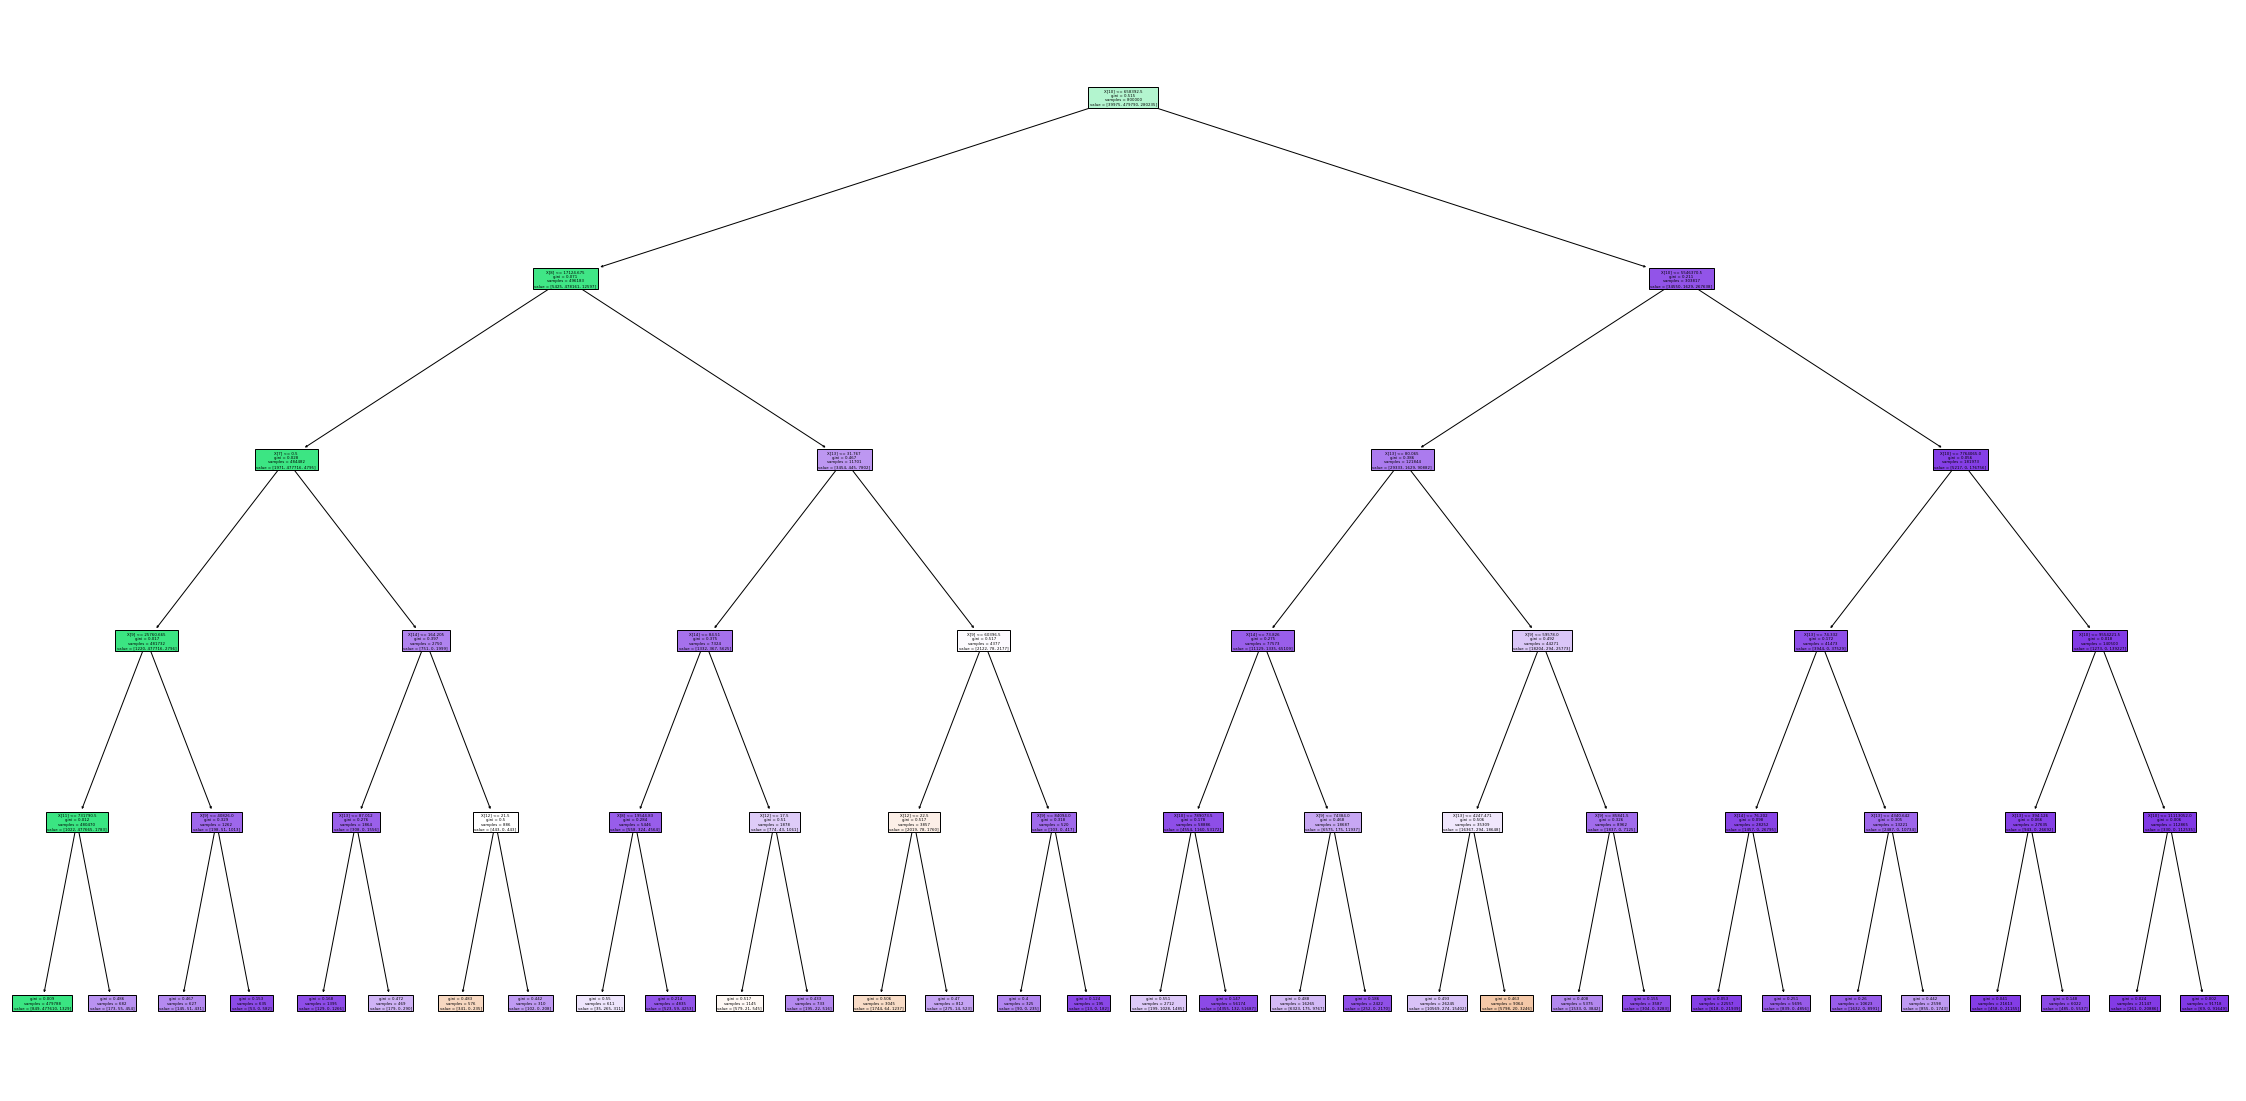

In [60]:
fig, ax = plt.subplots(figsize = (40, 20))
plot_tree(clf, filled = True, ax = ax)

In [61]:
y_pred = clf.predict(X_test)

In [62]:
accuracy = clf.score(X_test, y_test)

In [63]:
accuracy

0.94929

In [64]:
importances = clf.feature_importances_

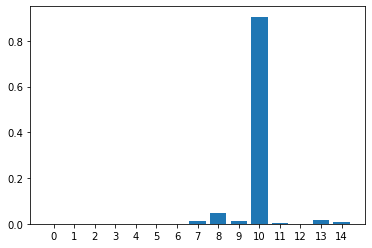

In [65]:
fig, ax = plt.subplots()
ax.bar(range(X.shape[1]), importances)
ax.set_xticks(range(X.shape[1]))

In [66]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

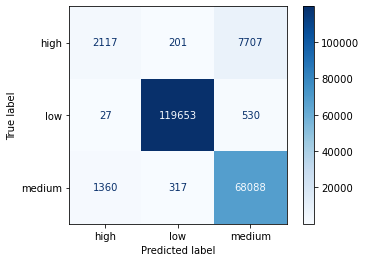

In [67]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

## Random Forest

In [68]:
columns = ['AGE', 'GENDER', 'occupation_risk', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'COUNTRY_RISK_RESIDENCY', 'COUNTRY_RISK_INCOME', 'PEP_FL', 'CASH_TOTAL_IN', 'CASH_TOTAL_OUT', 'WIRES_TOTAL_IN', 'WIRES_TOTAL_OUT', 'YEAR_AT_BANK', 'EMT_AVG_IN', 'EMT_AVG_OUT', 'RISK']
RF_df = DT_df[columns]

In [69]:
X = RF_df.drop('RISK', axis = 1)
y = RF_df['RISK']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [71]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)

In [72]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [73]:
y_pred = rf.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred)

In [75]:
accuracy

0.956895

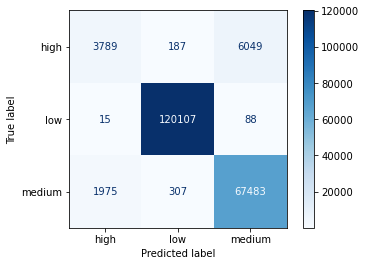

In [77]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

## Part 2

Use 65 bad actors to generate a plausible risk as dependent variable. 
mechanism: 
    bad actors -> risk = high (n = 65)
    customers who have transactions with bad actors -> risk = median (n = 49)
    others -> risk = low (1000000 - 65 - 49 = 999886)
Use model decision tree (max_depth = 5) and random forest(n_estimators=16) 
Output:
    accuracy of decision tree = 0.99987; 
    accuracy of random forest = 0.99987; 

In [101]:
# Use 65 bad actors to generate a plausible risk as dependent variable. 
# output: a list of risk level, following nodes.csv index
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False
all_customer_id = {}
names = nodes[["CUSTOMER_ID", "NAME"]]
arr = names.to_numpy()
customer_id_arr = []
original_name_arr = []
for val in arr:
    all_customer_id.update({int(val[0]):"low"})
    customer_id_arr.append(int(val[0]))
    
    string_val = val[1]
    if(not isfloat(string_val)):
        string_val = ''.join([i for i in string_val if i.isalpha()])
    else:
        string_val = "nan"
    original_name_arr.append(string_val.lower())

    
original_name_arr
    
target_names_arr = pd.read_csv('final_matching_results.csv')
arr = target_names_arr.to_numpy()
sanction_name_list = []
# merge first and last name and remove birthday numbers 
for val in arr:
    string_val = val[0] + ' ' + val[1]
    string_val = ''.join([i for i in string_val if i.isalpha()])
    sanction_name_list.append(string_val.lower())
    
#target_name_list

# Get index of sanction names from the node arr
original_name_list = []
sanction_index_list_arr = []
for val in sanction_name_list:
    sanction_index_list_arr.append(original_name_arr.index(val))
	
	
# Find out customer id for saction list customers 
sanction_list_customer_id_arr = []
for val in sanction_index_list_arr:
    sanction_list_customer_id_arr.append(customer_id_arr[val])	
	
def istransact(arr, val):
    try:
        arr.index(val)
        return True
    except ValueError:
        return False
# all 0 at first
# 0 low risk, 1 medium risk, 2 high risk

transactions_arr = pd.read_csv('UofT_edges.csv')
arr = transactions_arr.to_numpy()
source_arr = arr[:,0].astype(int)
target_arr = arr[:,1].astype(int)

danger_source_arr = []

for i in range(len(source_arr)):
    source_id = source_arr[i]
    # if the source_id is inside the sanction list, if yes set the corresponding target to be medium risk
    if(istransact(sanction_list_customer_id_arr, source_id)):
        all_customer_id.update({target_arr[i]:"medium"})
        
for i in range(len(target_arr)):
    target_id = target_arr[i]
    # if the target_id is inside the sanction list, if yes set the corresponding source to be medium risk
    if(istransact(sanction_list_customer_id_arr, target_id)):
        all_customer_id.update({source_arr[i]:"medium"})

for val in sanction_list_customer_id_arr:
    all_customer_id.update({val:"high"})
	
risk_level = []
for val in customer_id_arr:
    risk_level.append(all_customer_id[val])	
    	
	

## Decision Tree by using Predict bad actor risk as dependent

In [105]:
columns = ['AGE', 'GENDER', 'occupation_risk', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'COUNTRY_RISK_RESIDENCY', 'COUNTRY_RISK_INCOME', 'PEP_FL', 'CASH_TOTAL_IN', 'CASH_TOTAL_OUT', 'WIRES_TOTAL_IN', 'WIRES_TOTAL_OUT', 'YEAR_AT_BANK', 'EMT_AVG_IN', 'EMT_AVG_OUT', 'RISK']
DT_df = logreg_df_1[columns]
X = DT_df.drop('RISK', axis = 1)
y = risk_level

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [107]:
clf_bad_actor = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)

[Text(0.7132352941176471, 0.9166666666666666, 'X[10] <= 39220036.0\ngini = 0.0\nsamples = 800000\nvalue = [50, 799912, 38]'),
 Text(0.5441176470588235, 0.75, 'X[13] <= 22065.213\ngini = 0.0\nsamples = 799904\nvalue = [49, 799817, 38]'),
 Text(0.38235294117647056, 0.5833333333333334, 'X[13] <= 751.288\ngini = 0.0\nsamples = 799756\nvalue = [49, 799670, 37]'),
 Text(0.23529411764705882, 0.4166666666666667, 'X[1] <= 0.5\ngini = 0.0\nsamples = 685384\nvalue = [44, 685326, 14]'),
 Text(0.11764705882352941, 0.25, 'X[14] <= 11058.562\ngini = 0.0\nsamples = 375887\nvalue = [6, 375873, 8]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.0\nsamples = 374732\nvalue = [6, 374720, 6]'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.003\nsamples = 1155\nvalue = [0, 1153, 2]'),
 Text(0.35294117647058826, 0.25, 'X[9] <= 199310.0\ngini = 0.0\nsamples = 309497\nvalue = [38, 309453, 6]'),
 Text(0.29411764705882354, 0.08333333333333333, 'gini = 0.0\nsamples = 309168\nvalue = [37, 

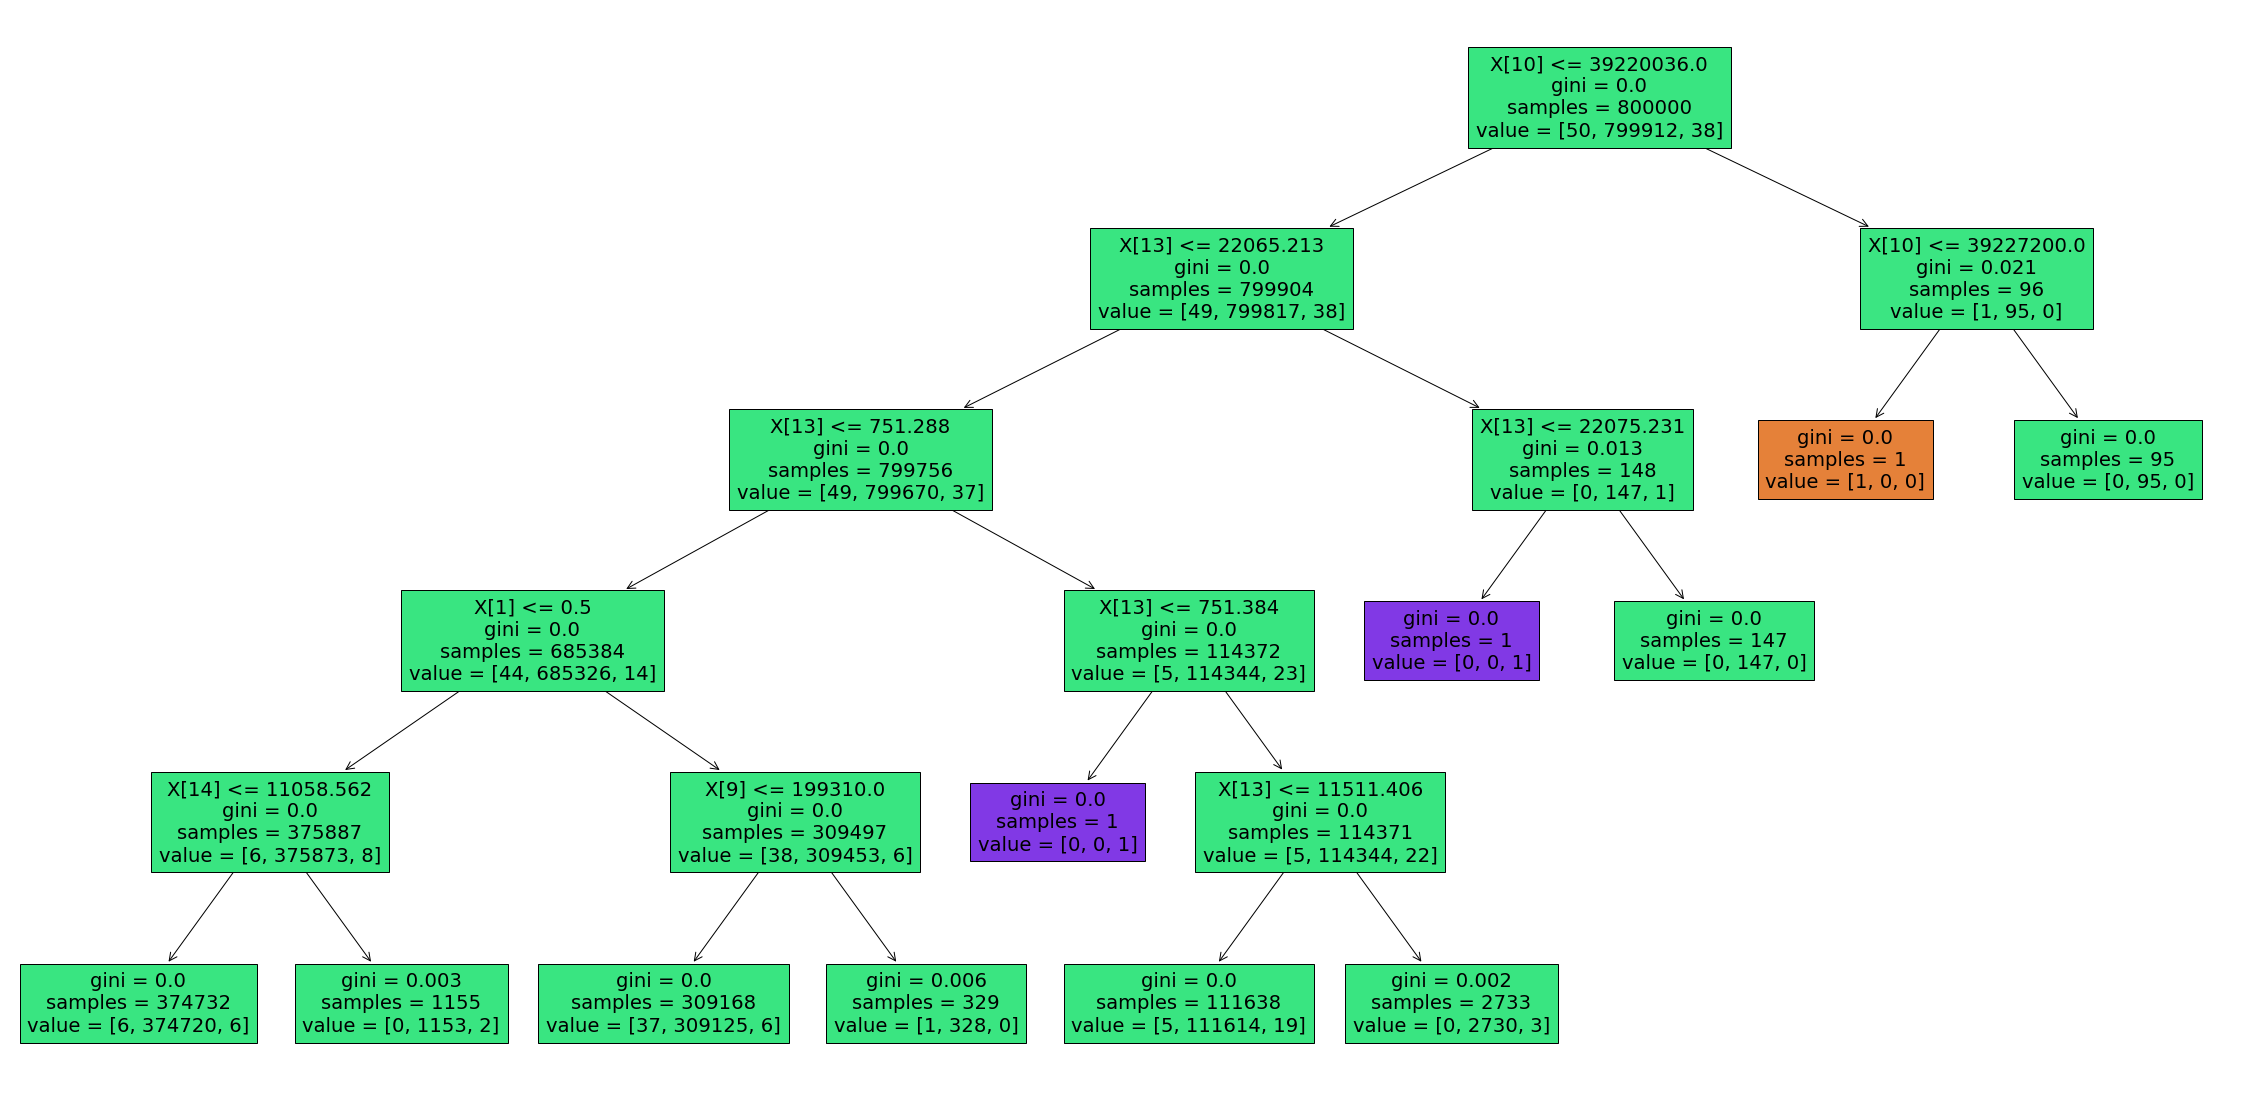

In [109]:
fig, ax = plt.subplots(figsize = (40, 20))
plot_tree(clf_bad_actor, filled = True, ax = ax)

In [110]:
# accuracy
y_pred = clf_bad_actor.predict(X_test)
accuracy = clf_bad_actor.score(X_test, y_test)
accuracy

0.99987

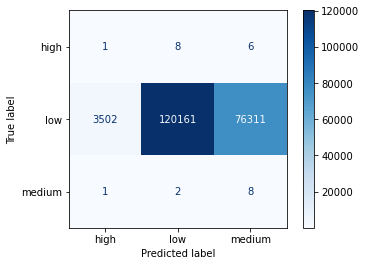

In [111]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

## Random Forest by Bad Actor

In [112]:
columns = ['AGE', 'GENDER', 'occupation_risk', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'COUNTRY_RISK_RESIDENCY', 'COUNTRY_RISK_INCOME', 'PEP_FL', 'CASH_TOTAL_IN', 'CASH_TOTAL_OUT', 'WIRES_TOTAL_IN', 'WIRES_TOTAL_OUT', 'YEAR_AT_BANK', 'EMT_AVG_IN', 'EMT_AVG_OUT', 'RISK']
RF_df = DT_df[columns]
X = RF_df.drop('RISK', axis = 1)
y = risk_level

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
rf = RandomForestClassifier(n_estimators = 16, random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=16, random_state=1)

In [116]:
# accuracy:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.99987

## Neural Network